In [3]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
from sklearn.feature_selection import chi2
from scipy.stats import f_oneway
import seaborn as sns

## Resampling Libary
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

## Model library
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score,classification_report

## Hypothesis testing Library
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.feature_selection import chi2
from scipy.stats import f_oneway

## Imbalanced data sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification

### Feature selection
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


# 1.Data Understanding and Preprocessing:

Import dataset from .csv file 

In [4]:
df=pd.read_csv(r"C:\Users\User\Downloads\exam_data.csv")

In [5]:
df.head(2)

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   

    ROA(B) before interest and depreciation after tax  \
0                                            0.40575    
1                                            0.51673    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   

    Equity to Liability  
0              0.016469  
1              0.020794  

[2 rows x 96 columns]

In [6]:
df.info(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

# Check no. rows and no. columns

In [7]:
df.shape

(6819, 96)

# Check null values in whole set

In [8]:
df.isnull().sum().sum()

0

In [9]:
# Changed the Bankrupt column name to make input easier
df = df.rename(columns={'Bankrupt?': 'Bankrupt'})

# Check duplicate values in the set

In [10]:
duplicates = pd.DataFrame()
for col in df.columns:
    duplicates[col] = df[col].duplicated().sum()

In [11]:
duplicates

Empty DataFrame
Columns: [Bankrupt,  ROA(C) before interest and depreciation before interest,  ROA(A) before interest and % after tax,  ROA(B) before interest and depreciation after tax,  Operating Gross Margin,  Realized Sales Gross Margin,  Operating Profit Rate,  Pre-tax net Interest Rate,  After-tax net Interest Rate,  Non-industry income and expenditure/revenue,  Continuous interest rate (after tax),  Operating Expense Rate,  Research and development expense rate,  Cash flow rate,  Interest-bearing debt interest rate,  Tax rate (A),  Net Value Per Share (B),  Net Value Per Share (A),  Net Value Per Share (C),  Persistent EPS in the Last Four Seasons,  Cash Flow Per Share,  Revenue Per Share (Yuan ¥),  Operating Profit Per Share (Yuan ¥),  Per Share Net profit before tax (Yuan ¥),  Realized Sales Gross Profit Growth Rate,  Operating Profit Growth Rate,  After-tax Net Profit Growth Rate,  Regular Net Profit Growth Rate,  Continuous Net Profit Growth Rate,  Total Asset Growth Rate,  Net Value Growth Rate,  Total Asset Return Growth Rate Ratio,  Cash Reinvestment %,  Current Ratio,  Quick Ratio,  Interest Expense Ratio,  Total debt/Total net worth,  Debt ratio %,  Net worth/Assets,  Long-term fund suitability ratio (A),  Borrowing dependency,  Contingent liabilities/Net worth,  Operating profit/Paid-in capital,  Net profit before tax/Paid-in capital,  Inventory and accounts receivable/Net value,  Total Asset Turnover,  Accounts Receivable Turnover,  Average Collection Days,  Inventory Turnover Rate (times),  Fixed Assets Turnover Frequency,  Net Worth Turnover Rate (times),  Revenue per person,  Operating profit per person,  Allocation rate per person,  Working Capital to Total Assets,  Quick Assets/Total Assets,  Current Assets/Total Assets,  Cash/Total Assets,  Quick Assets/Current Liability,  Cash/Current Liability,  Current Liability to Assets,  Operating Funds to Liability,  Inventory/Working Capital,  Inventory/Current Liability,  Current Liabilities/Liability,  Working Capital/Equity,  Current Liabilities/Equity,  Long-term Liability to Current Assets,  Retained Earnings to Total Assets,  Total income/Total expense,  Total expense/Assets,  Current Asset Turnover Rate,  Quick Asset Turnover Rate,  Working capitcal Turnover Rate,  Cash Turnover Rate,  Cash Flow to Sales,  Fixed Assets to Assets,  Current Liability to Liability,  Current Liability to Equity,  Equity to Long-term Liability,  Cash Flow to Total Assets,  Cash Flow to Liability,  CFO to Assets,  Cash Flow to Equity,  Current Liability to Current Assets,  Liability-Assets Flag,  Net Income to Total Assets,  Total assets to GNP price,  No-credit Interval,  Gross Profit to Sales,  Net Income to Stockholder's Equity,  Liability to Equity,  Degree of Financial Leverage (DFL),  Interest Coverage Ratio (Interest expense to EBIT),  Net Income Flag,  Equity to Liability]
Index: []

[0 rows x 96 columns]

In [12]:
#### Now we can remove whitespaces of columns 
df.columns=df.columns.str.strip()

In [13]:
df.columns

Index(['Bankrupt', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax 

# set the columns ans rows

In [14]:
pd.pandas.set_option("display.max_columns",None)   

In [15]:
pd.pandas.set_option("display.max_rows",None)

In [16]:
df.head(2)

Bankrupt  ROA(C) before interest and depreciation before interest  \
0         1                                           0.370594         
1         1                                           0.464291         

   ROA(A) before interest and % after tax  \
0                                0.424389   
1                                0.538214   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                            0.40575                0.601457   
1                                            0.51673                0.610235   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   

   Non-industry income and expenditure/revenue  \
0                                     0.302646   
1                                     0.303556   

   Continuous interest rate (after tax)  Operating Expense Rate  \
0                              0.780985                0.000126   
1                              0.781506                0.000290   

   Research and development expense rate  Cash flow rate  \
0                                    0.0        0.458143   
1                                    0.0        0.461867   

   Interest-bearing debt interest rate  Tax rate (A)  Net Value Per Share (B)  \
0                             0.000725           0.0                 0.147950   
1                             0.000647           0.0                 0.182251   

   Net Value Per Share (A)  Net Value Per Share (C)  \
0                 0.147950                 0.147950   
1                 0.182251                 0.182251   

   Persistent EPS in the Last Four Seasons  Cash Flow Per Share  \
0                                 0.169141             0.311664   
1                                 0.208944             0.318137   

   Revenue Per Share (Yuan ¥)  Operating Profit Per Share (Yuan ¥)  \
0                    0.017560                             0.095921   
1                    0.021144                             0.093722   

   Per Share Net profit before tax (Yuan ¥)  \
0                                  0.138736   
1                                  0.169918   

   Realized Sales Gross Profit Growth Rate  Operating Profit Growth Rate  \
0                                 0.022102                      0.848195   
1                                 0.022080                      0.848088   

   After-tax Net Profit Growth Rate  Regular Net Profit Growth Rate  \
0                          0.688979                        0.688979   
1                          0.689693                        0.689702   

   Continuous Net Profit Growth Rate  Total Asset Growth Rate  \
0                           0.217535             4.980000e+09   
1                           0.217620             6.110000e+09   

   Net Value Growth Rate  Total Asset Return Growth Rate Ratio  \
0               0.000327                              0.263100   
1               0.000443                              0.264516   

   Cash Reinvestment %  Current Ratio  Quick Ratio  Interest Expense Ratio  \
0             0.363725       0.002259     0.001208                0.629951   
1             0.376709       0.006016     0.004039                0.635172   

   Total debt/Total net worth  Debt ratio %  Net worth/Assets  \
0                    0.021266      0.207576          0.792424   
1                    0.012502      0.171176          0.828824   

   Long-term fund suitability ratio (A)  Borrowing dependency  \
0                              0.005024              0.390284   
1                              0.005059              0.376760   

   Contingent liabilities/Net worth  Operating profit/Paid-in capital  \
0               

# seperate Continuous and continous but catagorial data

In [17]:
df1=df.copy()

In [18]:
num_df = df1.drop(columns=["Net Income Flag","Liability-Assets Flag","Bankrupt"])

In [19]:
num_df.shape

(6819, 93)

In [20]:
pd.pandas.set_option("display.max_columns",None)
pd.pandas.set_option("display.max_rows",None)   

In [21]:
num_df.head(2)

ROA(C) before interest and depreciation before interest  \
0                                           0.370594         
1                                           0.464291         

   ROA(A) before interest and % after tax  \
0                                0.424389   
1                                0.538214   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                            0.40575                0.601457   
1                                            0.51673                0.610235   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   

   Non-industry income and expenditure/revenue  \
0                                     0.302646   
1                                     0.303556   

   Continuous interest rate (after tax)  Operating Expense Rate  \
0                              0.780985                0.000126   
1                              0.781506                0.000290   

   Research and development expense rate  Cash flow rate  \
0                                    0.0        0.458143   
1                                    0.0        0.461867   

   Interest-bearing debt interest rate  Tax rate (A)  Net Value Per Share (B)  \
0                             0.000725           0.0                 0.147950   
1                             0.000647           0.0                 0.182251   

   Net Value Per Share (A)  Net Value Per Share (C)  \
0                 0.147950                 0.147950   
1                 0.182251                 0.182251   

   Persistent EPS in the Last Four Seasons  Cash Flow Per Share  \
0                                 0.169141             0.311664   
1                                 0.208944             0.318137   

   Revenue Per Share (Yuan ¥)  Operating Profit Per Share (Yuan ¥)  \
0                    0.017560                             0.095921   
1                    0.021144                             0.093722   

   Per Share Net profit before tax (Yuan ¥)  \
0                                  0.138736   
1                                  0.169918   

   Realized Sales Gross Profit Growth Rate  Operating Profit Growth Rate  \
0                                 0.022102                      0.848195   
1                                 0.022080                      0.848088   

   After-tax Net Profit Growth Rate  Regular Net Profit Growth Rate  \
0                          0.688979                        0.688979   
1                          0.689693                        0.689702   

   Continuous Net Profit Growth Rate  Total Asset Growth Rate  \
0                           0.217535             4.980000e+09   
1                           0.217620             6.110000e+09   

   Net Value Growth Rate  Total Asset Return Growth Rate Ratio  \
0               0.000327                              0.263100   
1               0.000443                              0.264516   

   Cash Reinvestment %  Current Ratio  Quick Ratio  Interest Expense Ratio  \
0             0.363725       0.002259     0.001208                0.629951   
1             0.376709       0.006016     0.004039                0.635172   

   Total debt/Total net worth  Debt ratio %  Net worth/Assets  \
0                    0.021266      0.207576          0.792424   
1                    0.012502      0.171176          0.828824   

   Long-term fund suitability ratio (A)  Borrowing dependency  \
0                              0.005024              0.390284   
1                              0.005059              0.376760   

   Contingent liabilities/Net worth  Operating profit/Paid-in capital  \
0                          0.006479           

In [22]:
cata_df = df1[["Net Income Flag","Liability-Assets Flag","Bankrupt"]]

In [23]:
cata_df.head(2)

Net Income Flag  Liability-Assets Flag  Bankrupt
0                1                      0         1
1                1                      0         1

# Detect and handle outliers --> continuous data

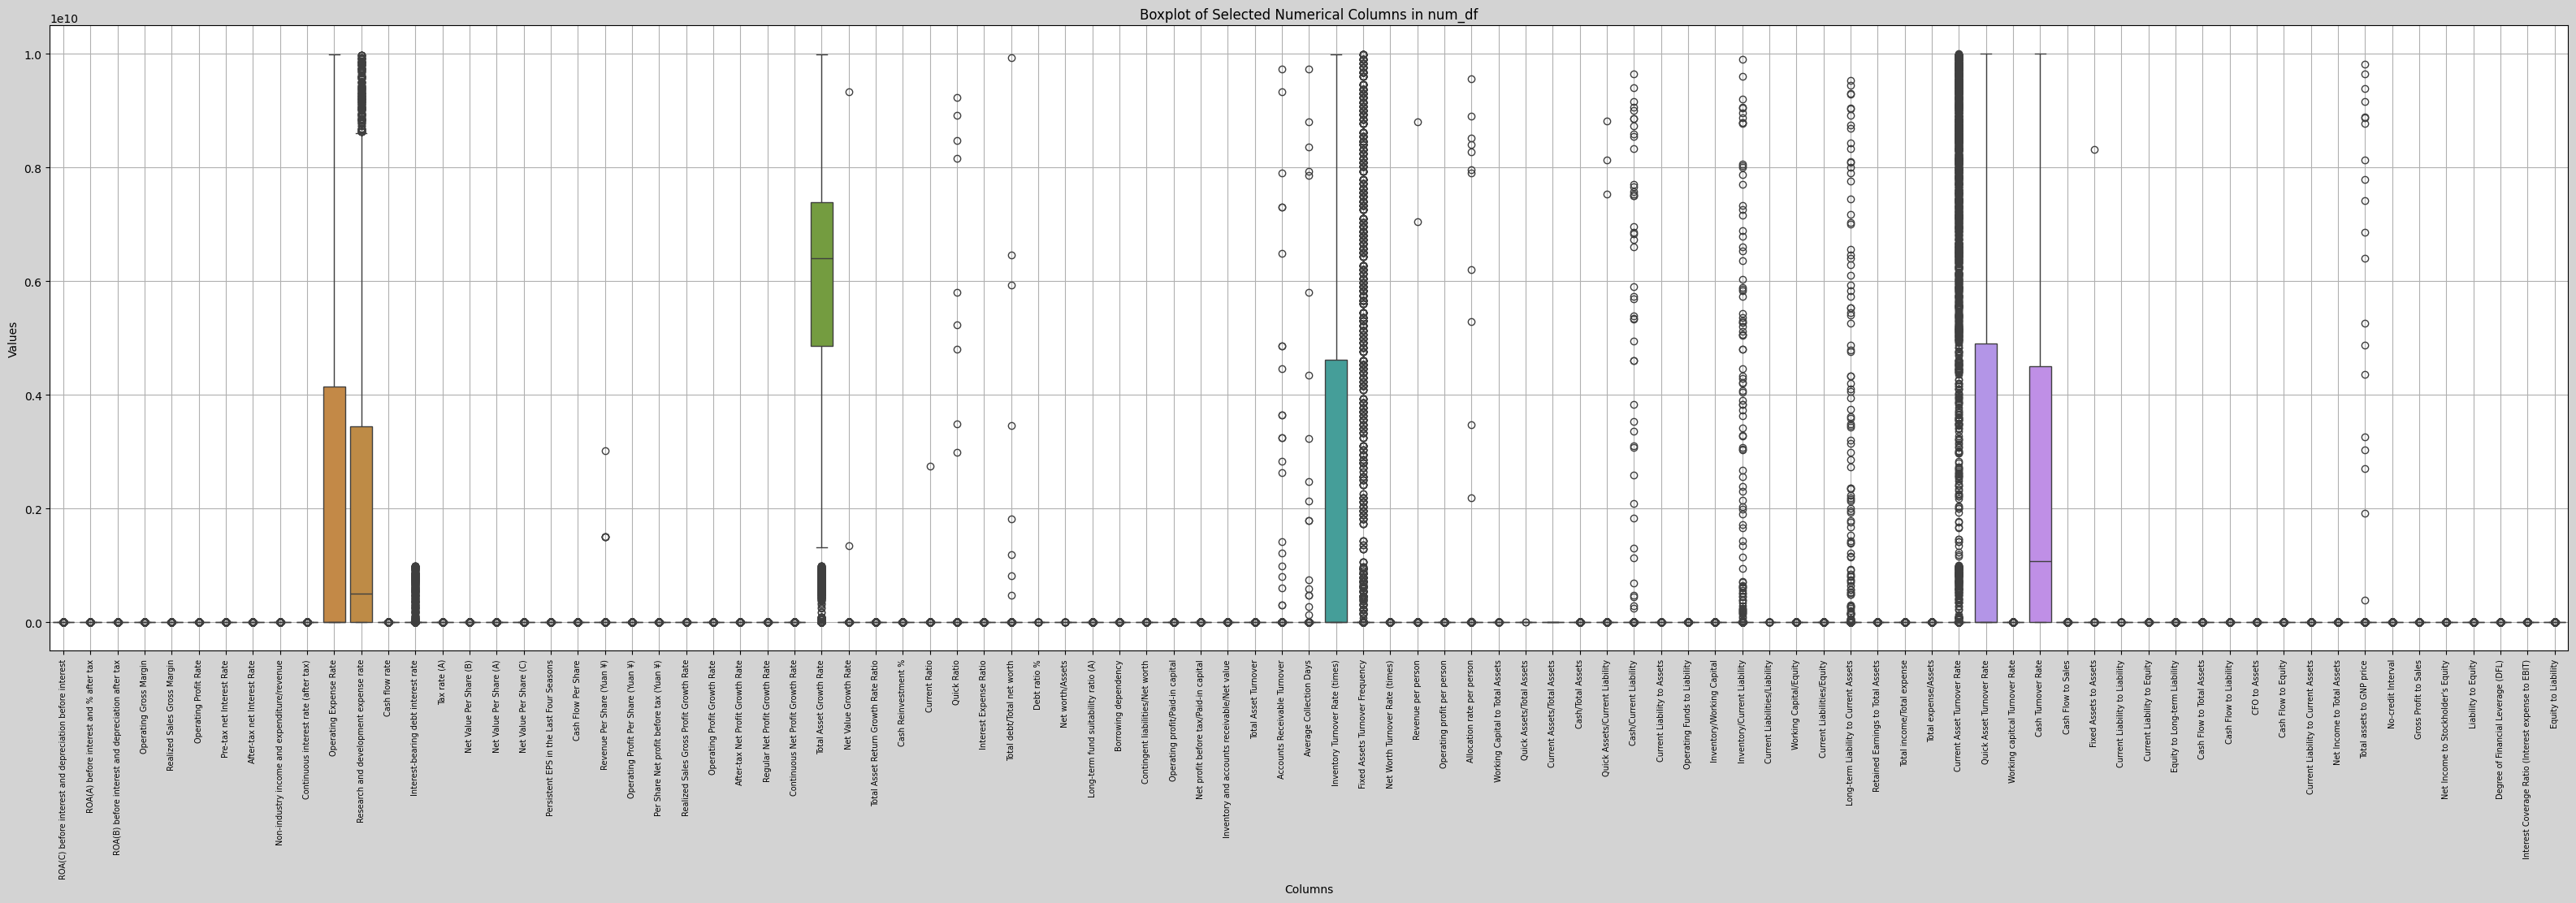

In [24]:
fig = plt.figure(figsize=(40,10))
sns.boxplot(data=num_df)
plt.xticks(rotation=90, fontsize=7)
plt.title("Boxplot of Selected Numerical Columns in num_df")
plt.ylabel("Values")
plt.xlabel("Columns")

fig.set_facecolor("lightgrey")
plt.grid(True)
plt.show()

In [25]:
# seperate out the column which has outliers
outlier_columns = []
for x in num_df.columns:  
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    lf = Q1 - 1.5 * IQR
    uf = Q3 + 1.5 * IQR
    if ((num_df[x] < lf) | (num_df[x] > uf)).any():
        outlier_columns.append(x)
print(outlier_columns)


['ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin', 'Operating Profit Rate', 'Pre-tax net Interest Rate', 'After-tax net Interest Rate', 'Non-industry income and expenditure/revenue', 'Continuous interest rate (after tax)', 'Research and development expense rate', 'Cash flow rate', 'Interest-bearing debt interest rate', 'Tax rate (A)', 'Net Value Per Share (B)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons', 'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)', 'Operating Profit Per Share (Yuan ¥)', 'Per Share Net profit before tax (Yuan ¥)', 'Realized Sales Gross Profit Growth Rate', 'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate', 'Regular Net Profit Growth Rate', 'Continuous Net Profit Growth Rate', 'Total Asset Growth Rate', 'Net Value Growth Rate', 'Total A

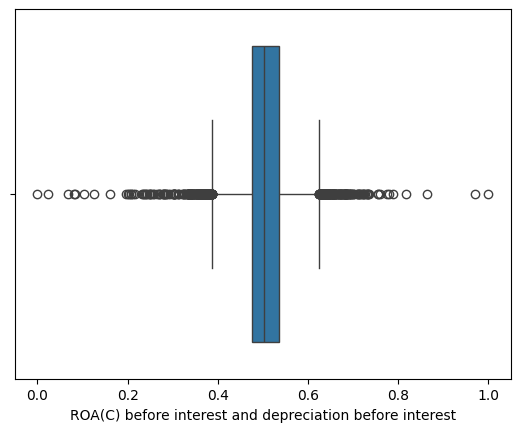

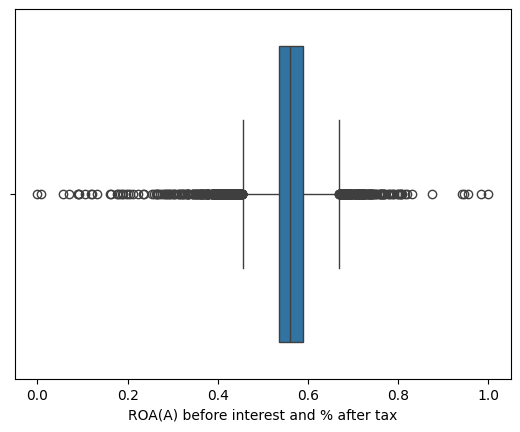

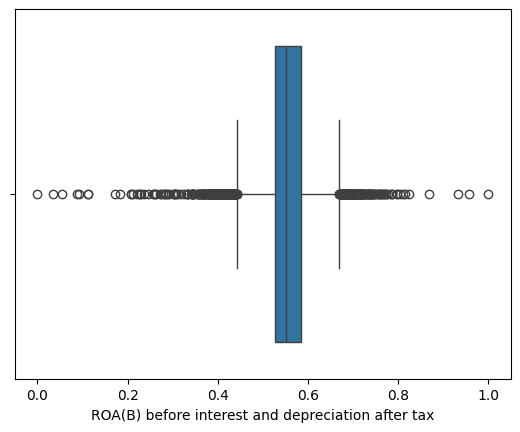

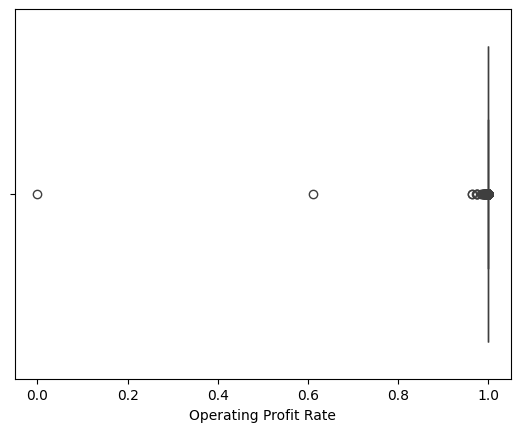

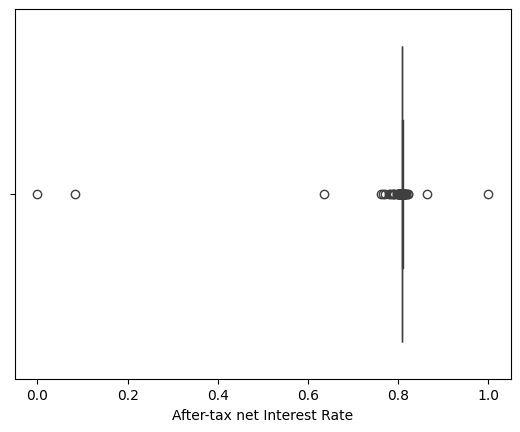

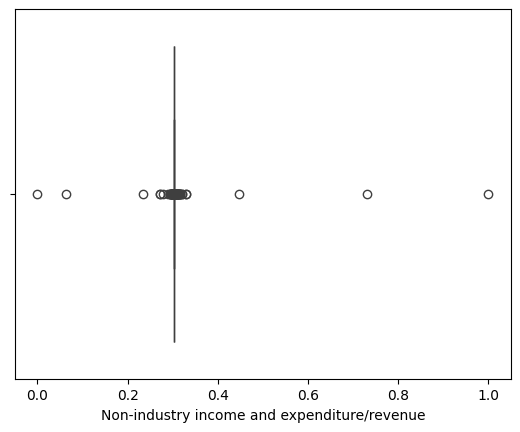

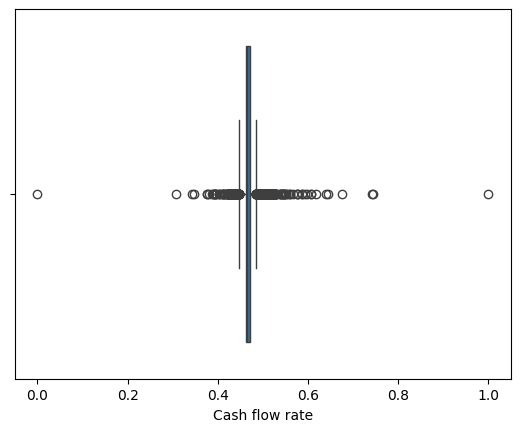

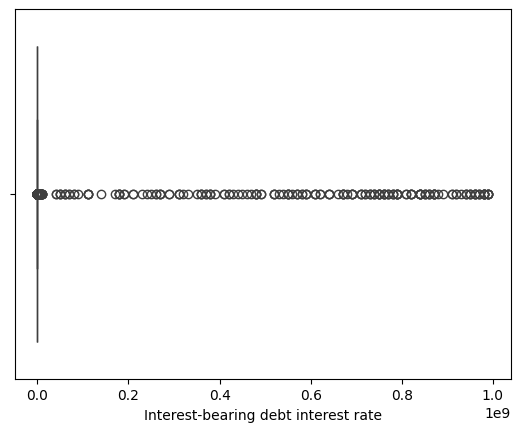

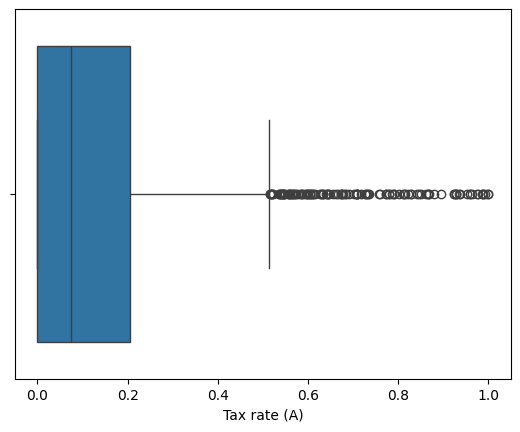

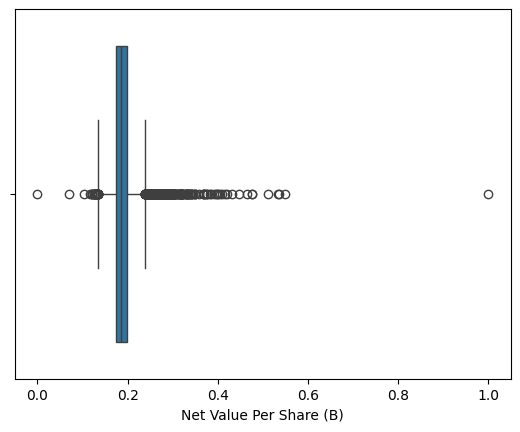

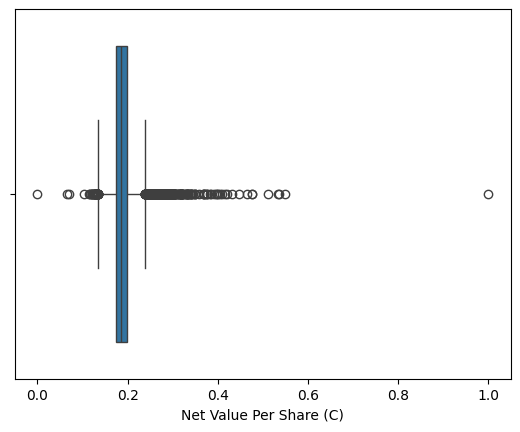

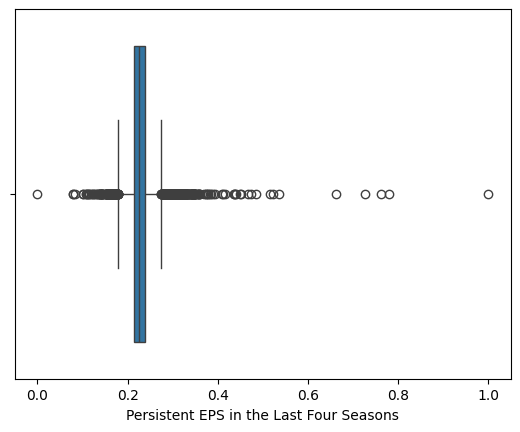

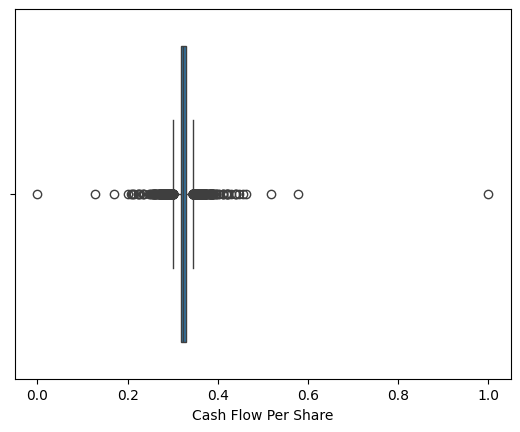

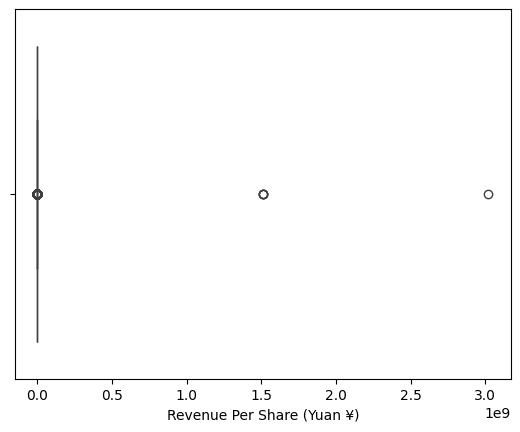

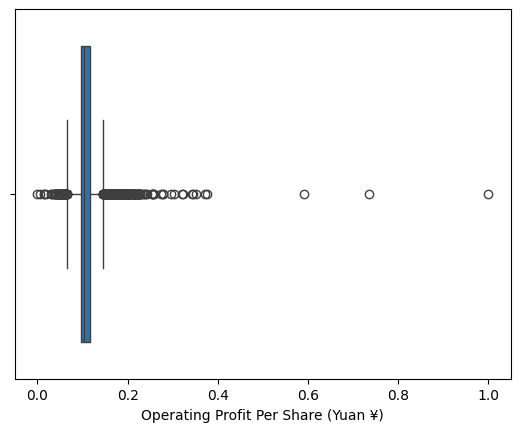

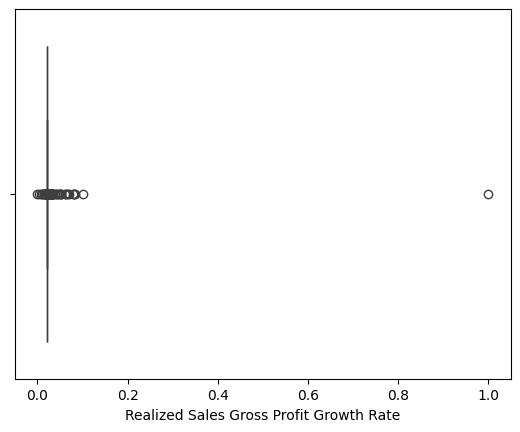

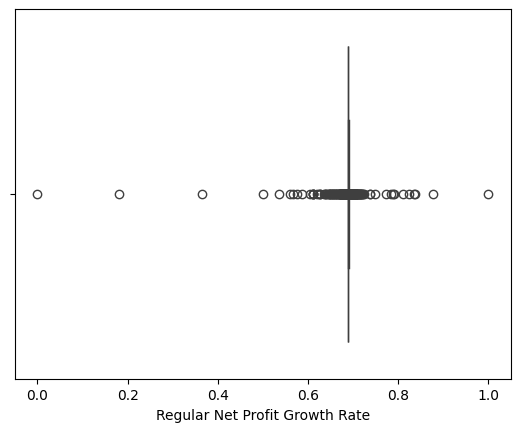

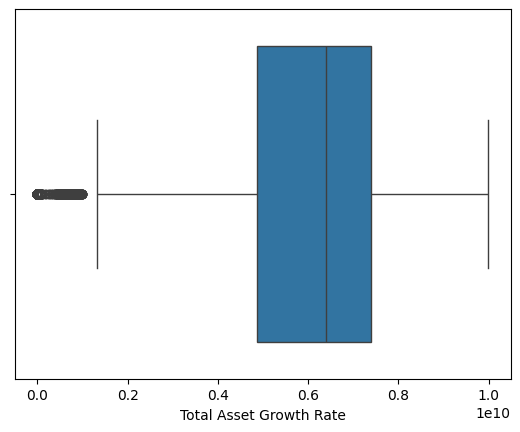

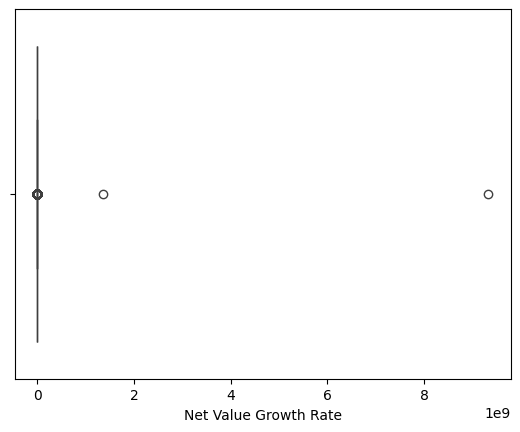

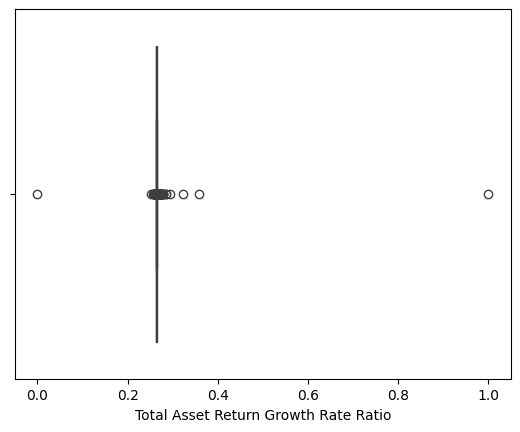

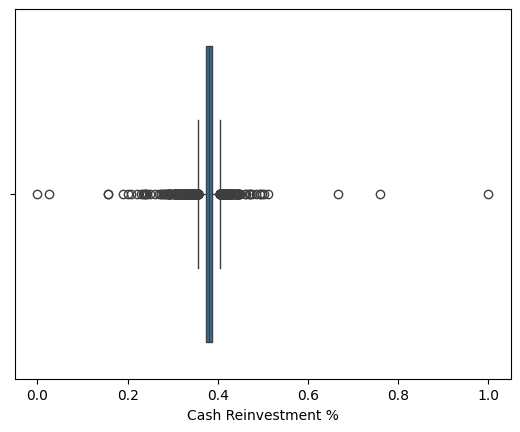

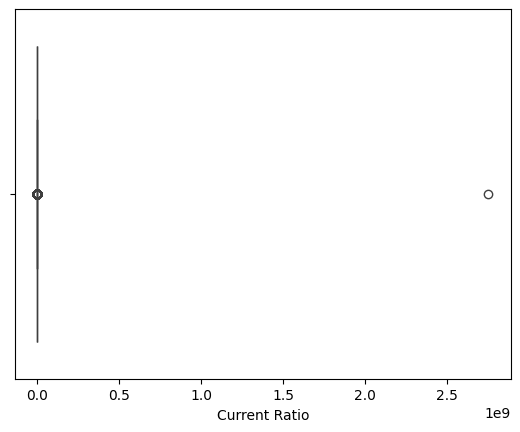

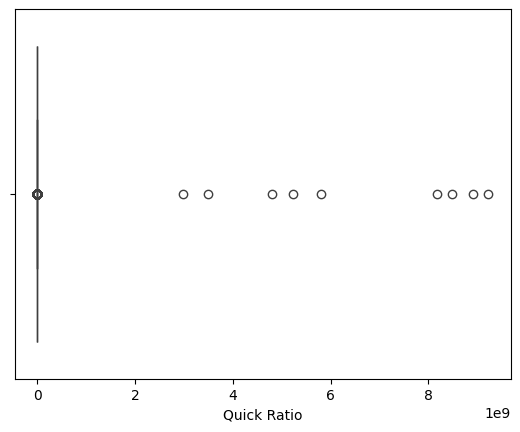

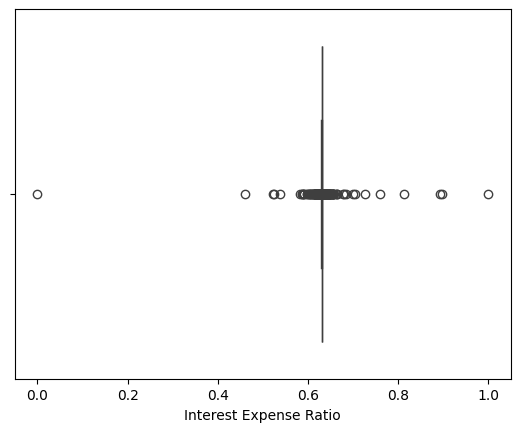

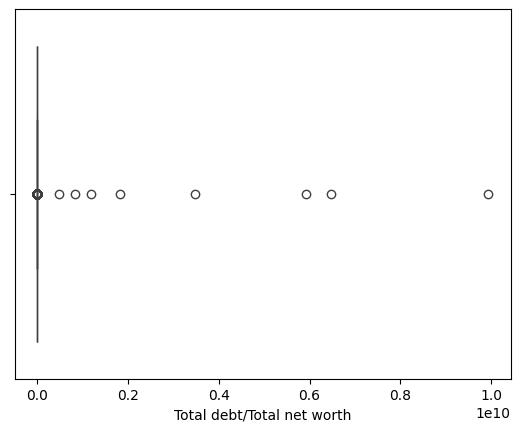

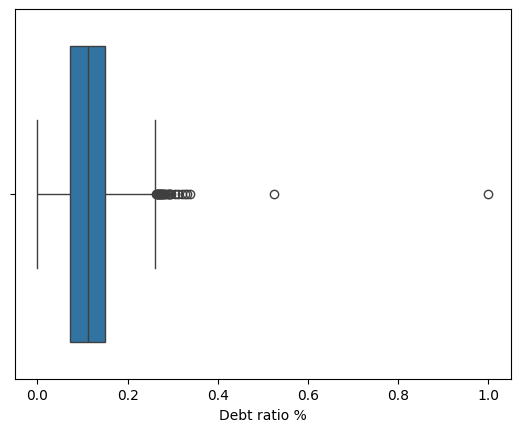

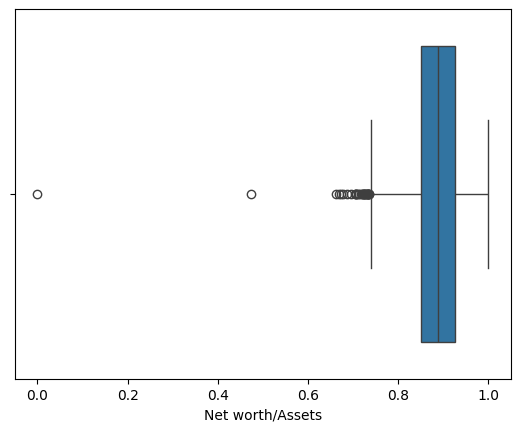

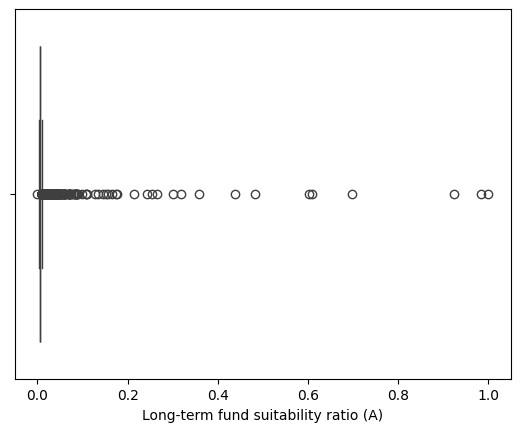

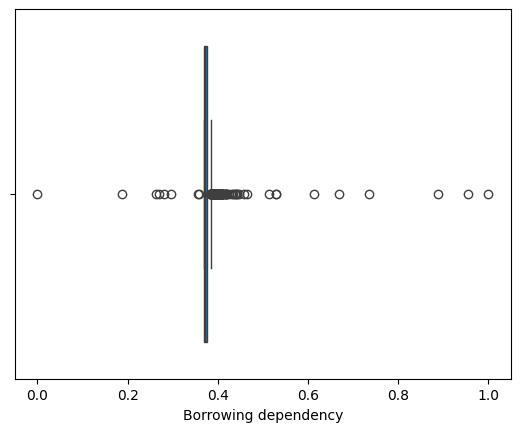

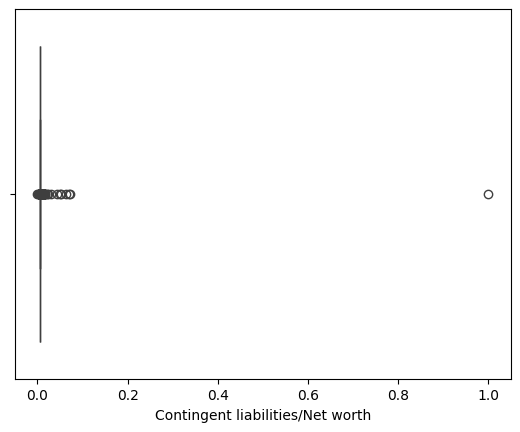

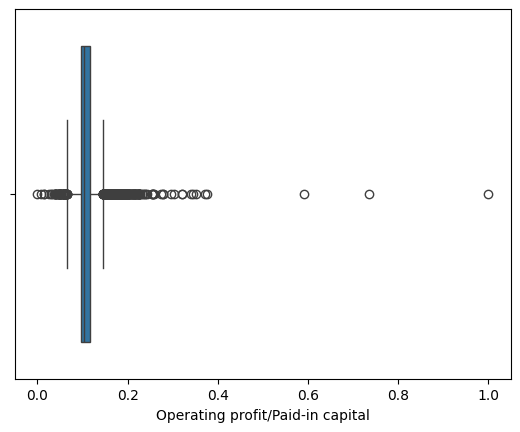

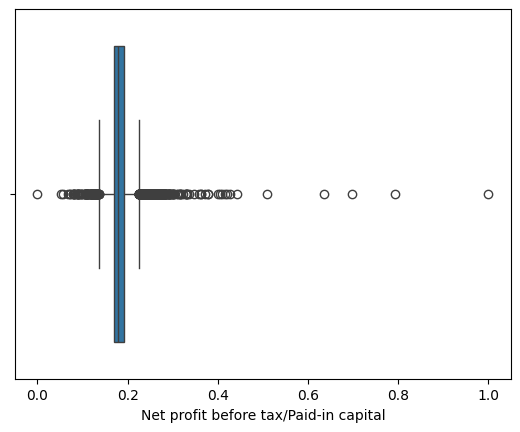

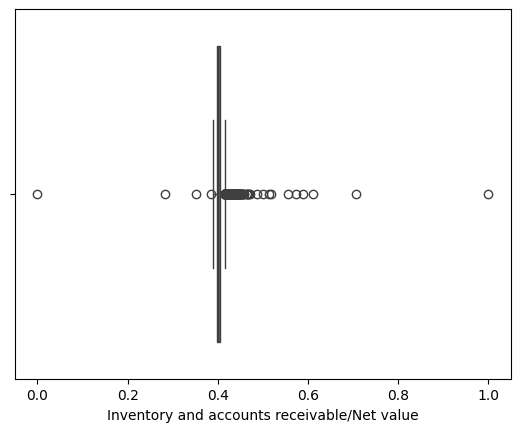

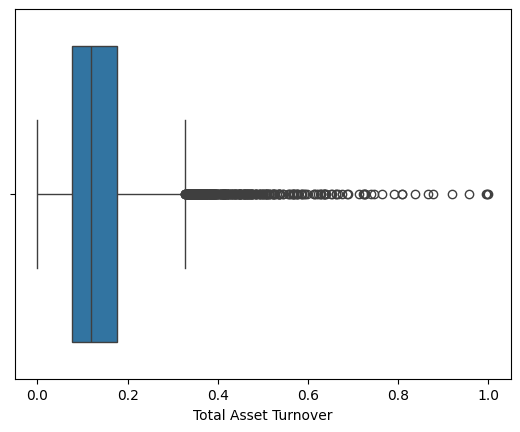

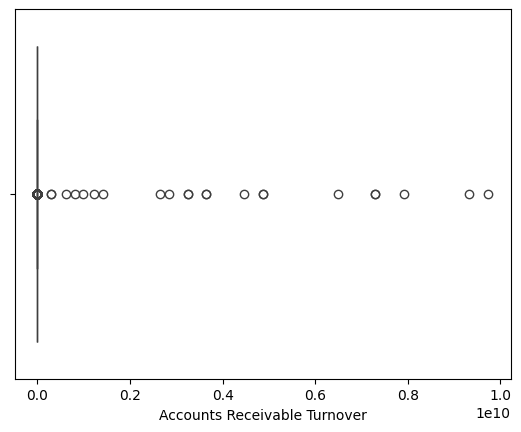

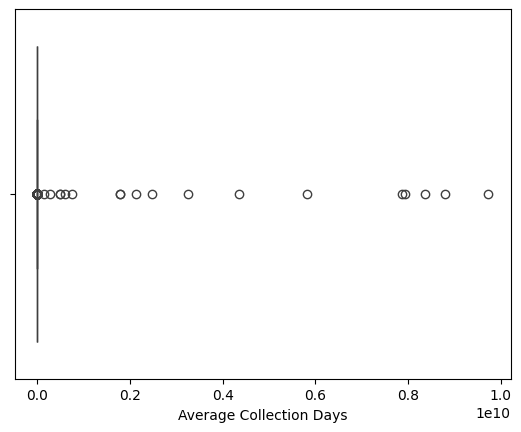

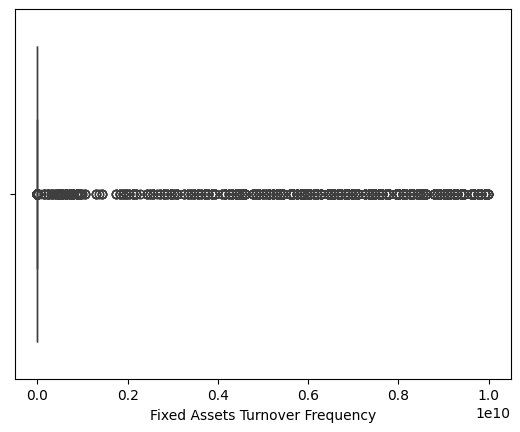

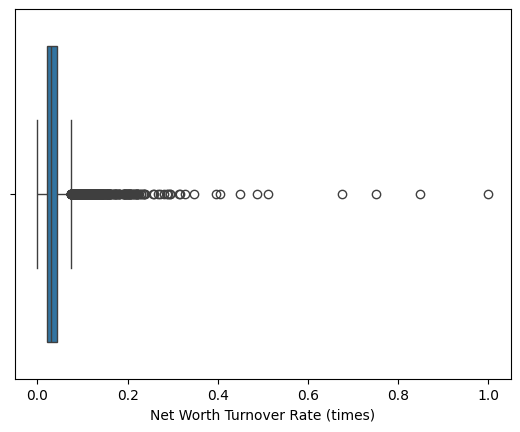

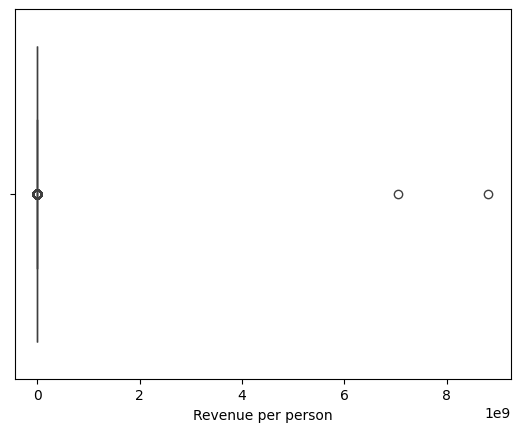

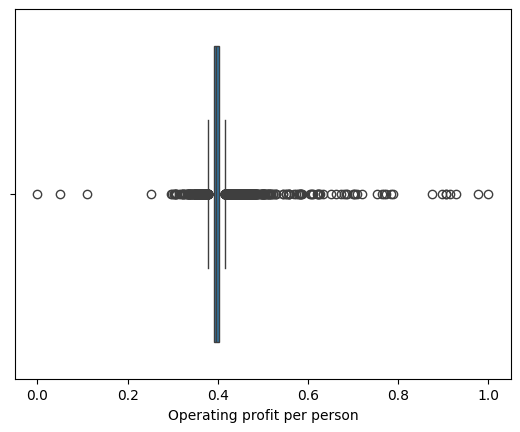

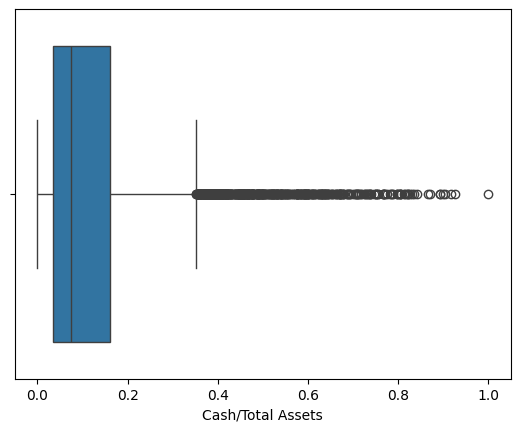

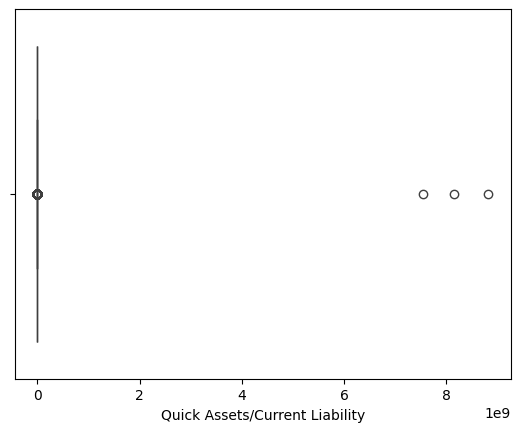

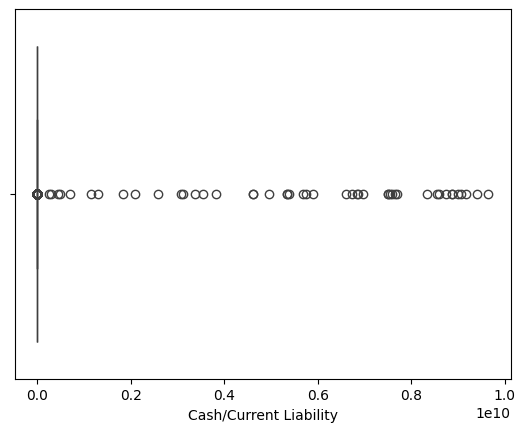

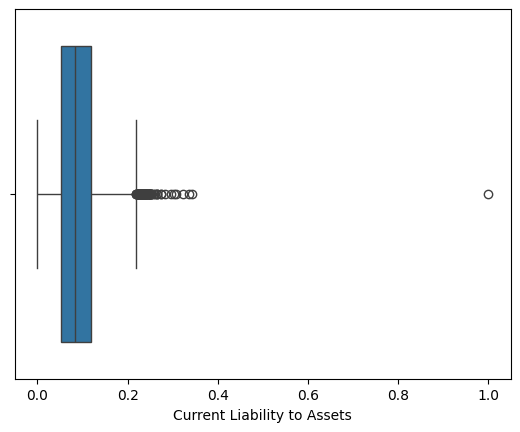

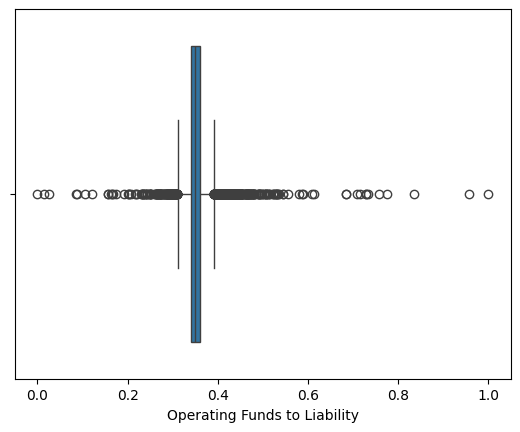

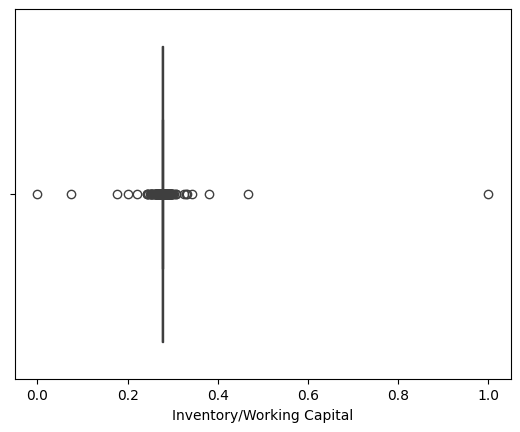

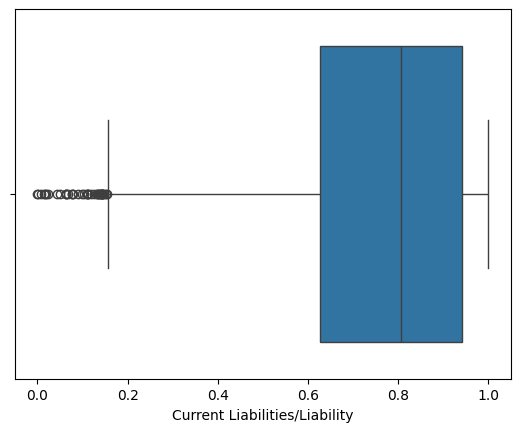

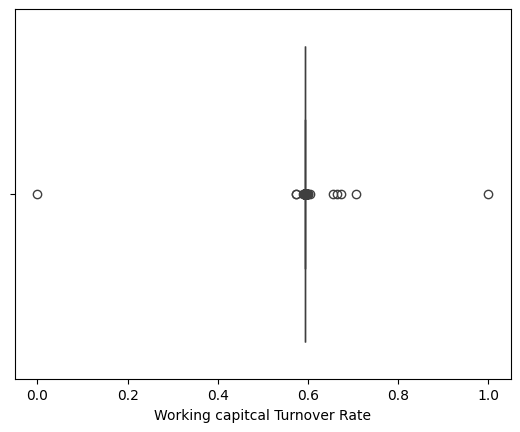

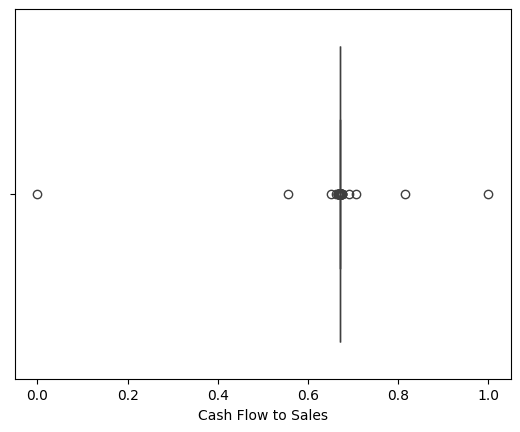

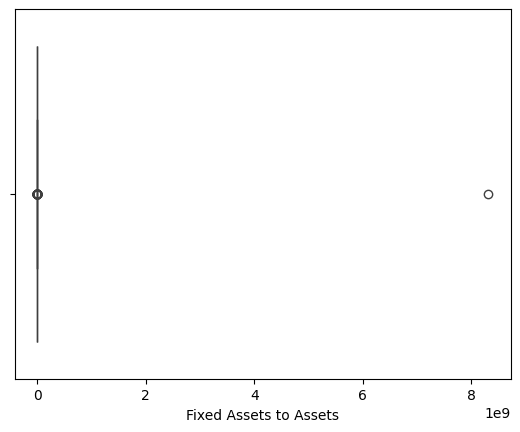

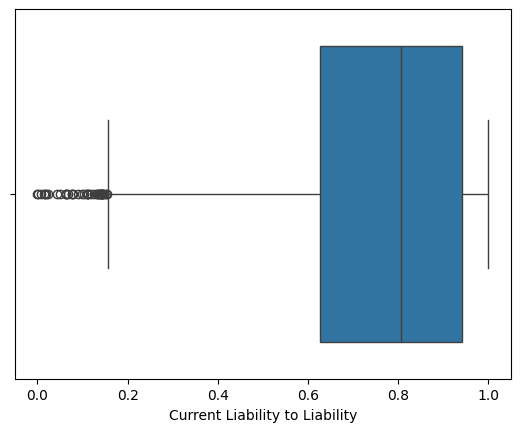

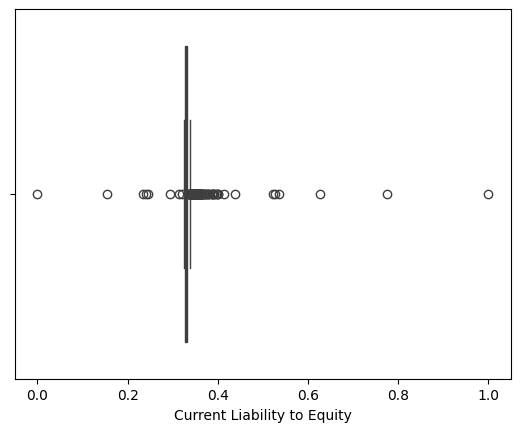

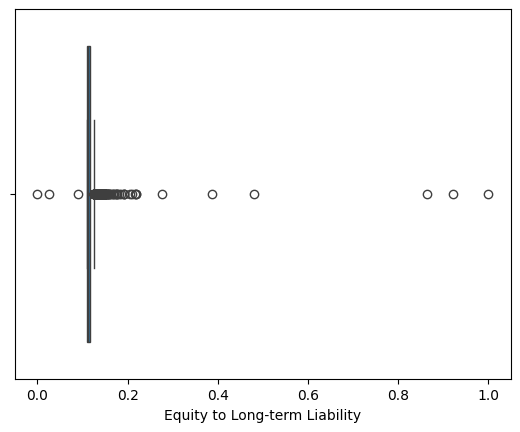

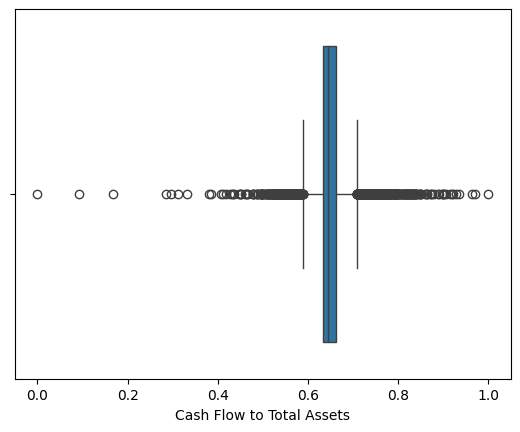

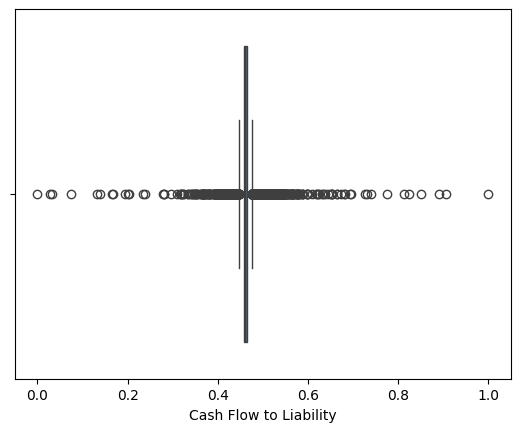

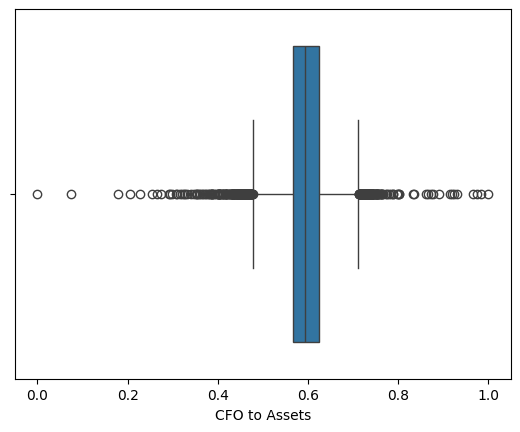

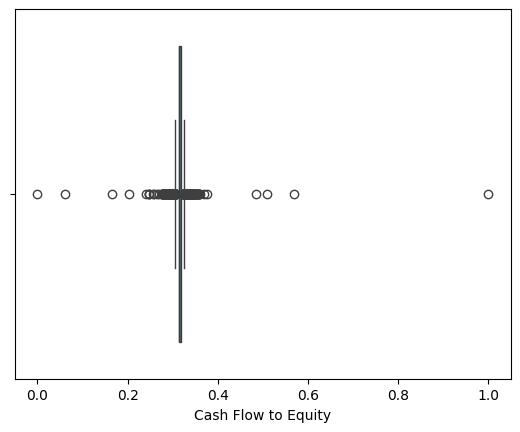

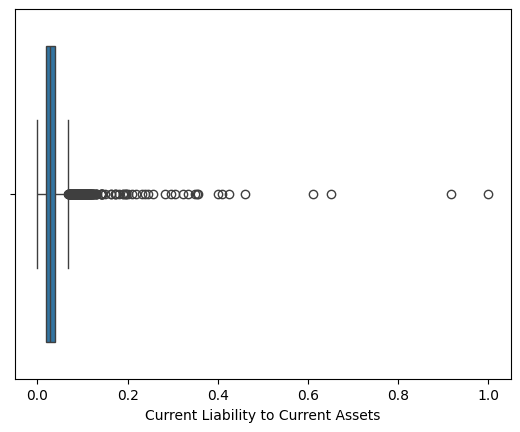

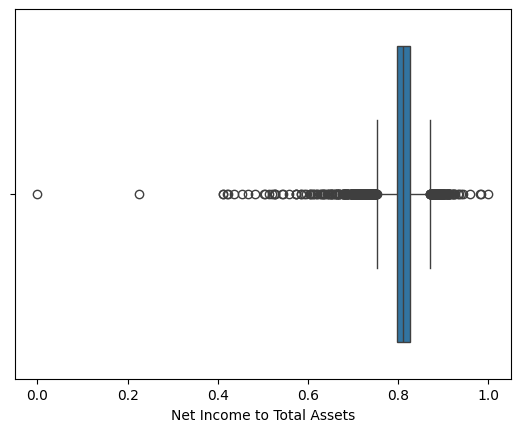

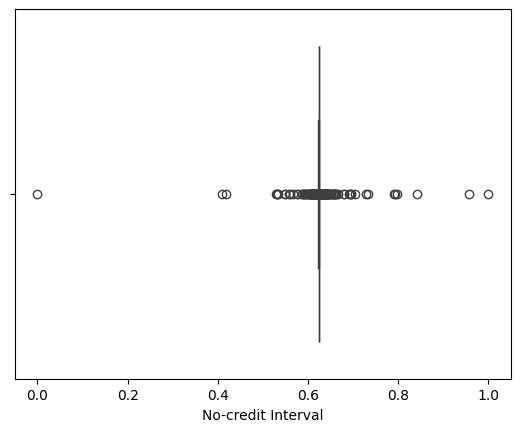

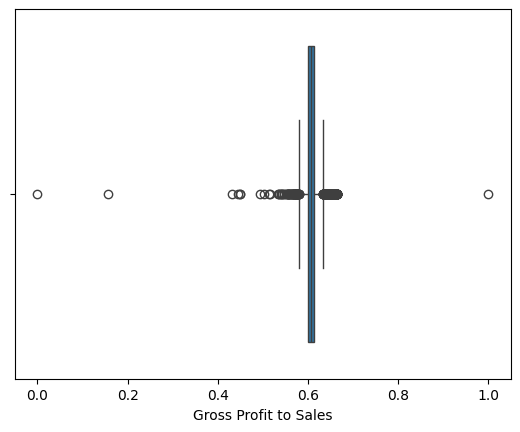

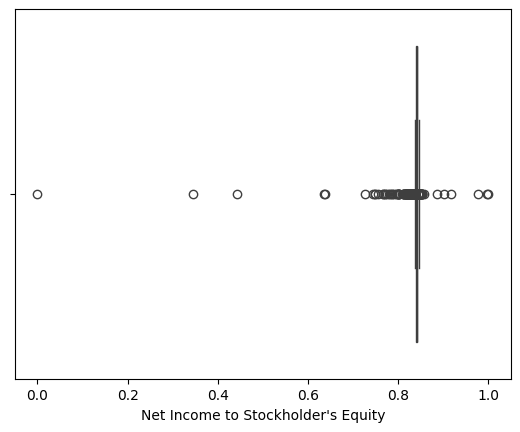

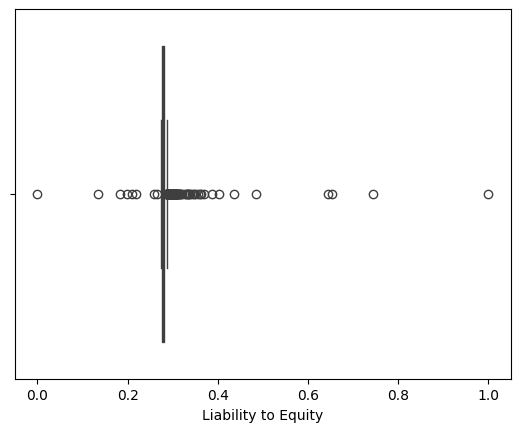

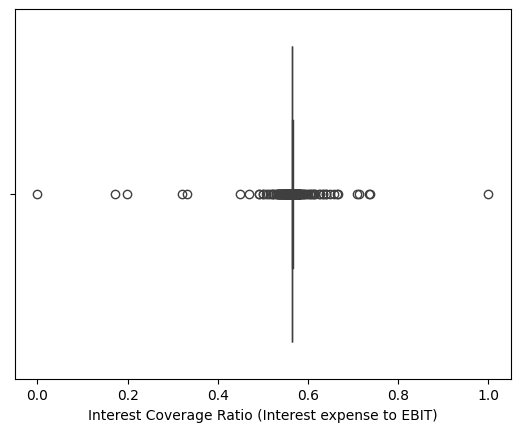

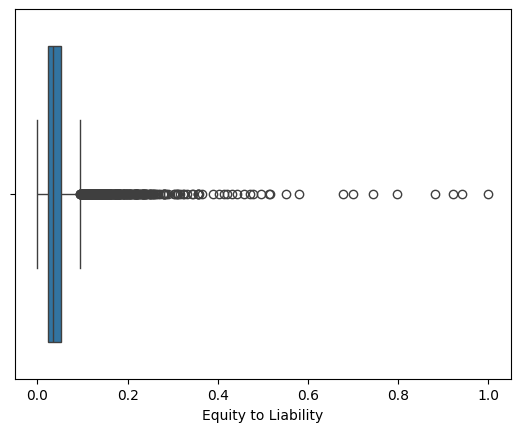

In [26]:
for i in outlier_columns:
    sns.boxplot(x=num_df[i])
    plt.show()

# handle outliers 

In [27]:
## This is function which is used to handel outliers here we impute outliers by using ub and lb
def impute(x):
    Q3=df[x].quantile(0.75)
    Q1=df[x].quantile(0.25)
    IQR=Q3-Q1
    lb=Q1-1.5*(IQR)
    ub=Q3+1.5*(IQR)
    idx=np.where(num_df[x]>ub)
    num_df[x].iloc[idx]=ub
    idx=np.where(num_df[x]<lb)
    num_df[x].iloc[idx]=lb

In [28]:
cnt=0
for col in num_df.columns:
    if col in outlier_columns:
        impute(col)

## Outliers are impute by using lower bound and upper bound

C:\Users\User\AppData\Local\Temp\ipykernel_15912\347061043.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  num_df[x].iloc[idx]=ub
C:\Users\User\AppData\Local\Temp\ipykernel_15912\347061043.py:11: FutureWarning: ChainedAssignmentError: be

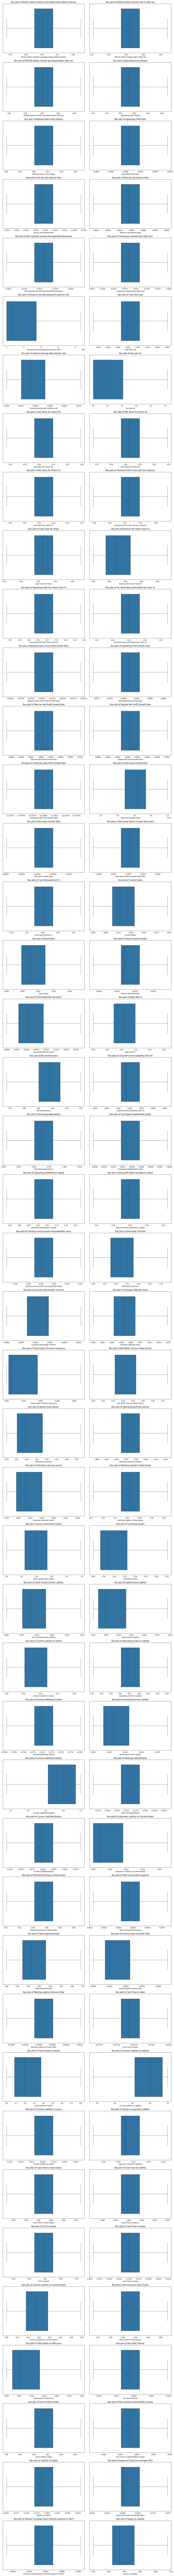

In [29]:
## now againg we check outliers are present or not using boxplot
## To detect outlier we also plot box plot 
def plot_box_plots(num_df, columns):
    num_columns = len(columns)
    num_rows = (num_columns + 1) // 2  # Number of rows for the subplots grid

    plt.figure(figsize=(15, 5 * num_rows))

    for i, col in enumerate(columns, 1):
        plt.subplot(num_rows, 2, i)
        sns.boxplot(x=num_df[col])
        plt.title(f'Box plot of {col}')

    plt.tight_layout()
    plt.show()

plot_box_plots(num_df,outlier_columns)

# 2. Exploratory Data Analysis (EDA):


In [30]:
num_df.describe()

ROA(C) before interest and depreciation before interest  \
count                                        6819.000000         
mean                                            0.505667         
std                                             0.051483         
min                                             0.387973         
25%                                             0.476527         
50%                                             0.502706         
75%                                             0.535563         
max                                             0.624116         

       ROA(A) before interest and % after tax  \
count                             6819.000000   
mean                                 0.560507   
std                                  0.050087   
min                                  0.455122   
25%                                  0.535543   
50%                                  0.559802   
75%                                  0.589157   
max                                  0.669579   

       ROA(B) before interest and depreciation after tax  \
count                                        6819.000000   
mean                                            0.554691   
std                                             0.050277   
min                                             0.442034   
25%                                             0.527277   
50%                                             0.552278   
75%                                             0.584105   
max                                             0.669348   

       Operating Gross Margin  Realized Sales Gross Margin  \
count             6819.000000                  6819.000000   
mean                 0.607834                     0.607812   
std                  0.010758                     0.010725   
min                  0.580240                     0.580321   
25%                  0.600445                     0.600434   
50%                  0.605997                     0.605976   
75%                  0.613914                     0.613842   
max                  0.634118                     0.633954   

       Operating Profit Rate  Pre-tax net Interest Rate  \
count            6819.000000                6819.000000   
mean                0.999028                   0.797467   
std                 0.000120                   0.000189   
min                 0.998781                   0.797096   
25%                 0.998969                   0.797386   
50%                 0.999022                   0.797464   
75%                 0.999095                   0.797579   
max                 0.999282                   0.797868   

       After-tax net Interest Rate  \
count                  6819.000000   
mean                      0.809378   
std                       0.000157   
min                       0.809075   
25%                       0.809312   
50%                       0.809375   
75%                       0.809469   
max                       0.809706   

       Non-industry income and expenditure/revenue  \
count                                  6819.000000   
mean                                      0.303526   
std                                       0.000124   
min                                       0.303288   
25%                                       0.303466   
50%                                       0.303525   
75%                                       0.303585   
max                                       0.303764   

       Continuous interest rate (after tax)  Operating Expense Rate  \
count                           6819.000000            6.819000e+03   
mean                               0.781637            1.995347e+09   
std                                0.000166            3.237684e+09   
min                                0.781314            0.000000e+00   
25%                                0.781567            1.566874e-04   
50%                                0.781635            2.777589e-04   
75%        

In [31]:
cata_df.describe()

Net Income Flag  Liability-Assets Flag     Bankrupt
count           6819.0            6819.000000  6819.000000
mean               1.0               0.001173     0.032263
std                0.0               0.034234     0.176710
min                1.0               0.000000     0.000000
25%                1.0               0.000000     0.000000
50%                1.0               0.000000     0.000000
75%                1.0               0.000000     0.000000
max                1.0               1.000000     1.000000

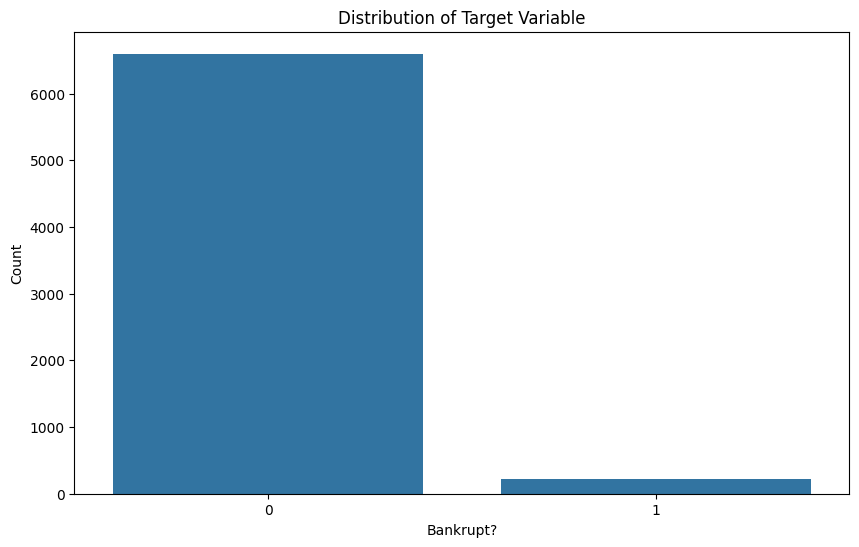

In [32]:
# Plot the distribution of the target variable
# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x=cata_df['Bankrupt'])
plt.title('Distribution of Target Variable')
plt.xlabel('Bankrupt?')
plt.ylabel('Count')
plt.show()

In [33]:
# Plot the distribution of features
# histogram plot for num_df which contains only continous data
num_df.hist(figsize=(50,50))
plt.show()

In [34]:
## From distribution Plot we observed that the most of the columns are normally distributed

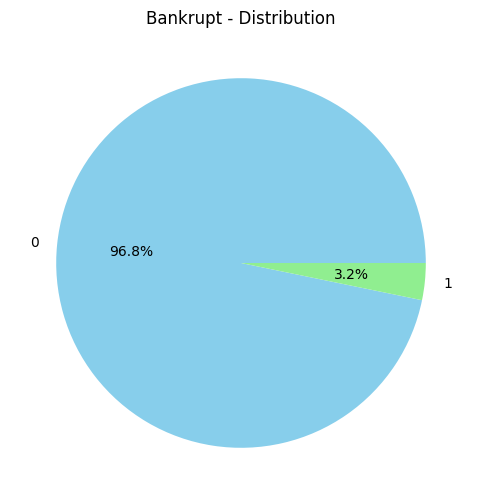

Bankrupt
0    6599
1     220
Name: count, dtype: int64


In [35]:
# pie chart for conitnous but catagorial data
# Pie chart for 'Bankrupt?'
plt.figure(figsize=(8, 6))
cata_df['Bankrupt'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Bankrupt - Distribution')
plt.ylabel('')
plt.show()
print(df['Bankrupt'].value_counts())

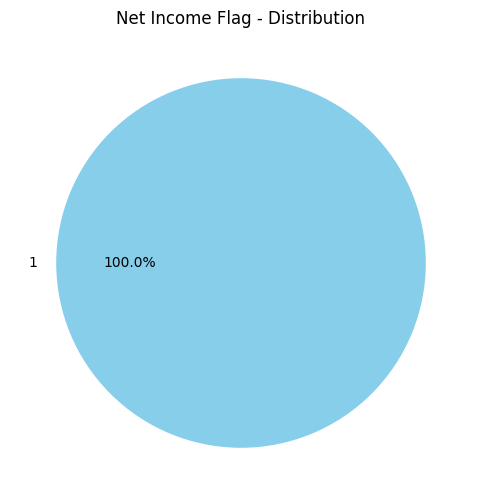

In [36]:
# Pie chart for 'Net Income Flag'
plt.figure(figsize=(8, 6))
cata_df['Net Income Flag'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Net Income Flag - Distribution')
plt.ylabel('')
plt.show()

In [37]:
# Pie chart for 'Liability-Assets Flag'
plt.figure(figsize=(8, 6))
cata_df['Liability-Assets Flag'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Liability-Assets Flag - Distribution')
plt.ylabel('')
plt.show()

In [38]:
## Now we calculate the descriptive statistic of all continous columns 
df1.describe()

Bankrupt  ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000         
mean      0.032263                                           0.505180         
std       0.176710                                           0.060686         
min       0.000000                                           0.000000         
25%       0.000000                                           0.476527         
50%       0.000000                                           0.502706         
75%       0.000000                                           0.535563         
max       1.000000                                           1.000000         

       ROA(A) before interest and % after tax  \
count                             6819.000000   
mean                                 0.558625   
std                                  0.065620   
min                                  0.000000   
25%                                  0.535543   
50%                                  0.559802   
75%                                  0.589157   
max                                  1.000000   

       ROA(B) before interest and depreciation after tax  \
count                                        6819.000000   
mean                                            0.553589   
std                                             0.061595   
min                                             0.000000   
25%                                             0.527277   
50%                                             0.552278   
75%                                             0.584105   
max                                             1.000000   

       Operating Gross Margin  Realized Sales Gross Margin  \
count             6819.000000                  6819.000000   
mean                 0.607948                     0.607929   
std                  0.016934                     0.016916   
min                  0.000000                     0.000000   
25%                  0.600445                     0.600434   
50%                  0.605997                     0.605976   
75%                  0.613914                     0.613842   
max                  1.000000                     1.000000   

       Operating Profit Rate  Pre-tax net Interest Rate  \
count            6819.000000                6819.000000   
mean                0.998755                   0.797190   
std                 0.013010                   0.012869   
min                 0.000000                   0.000000   
25%                 0.998969                   0.797386   
50%                 0.999022                   0.797464   
75%                 0.999095                   0.797579   
max                 1.000000                   1.000000   

       After-tax net Interest Rate  \
count                  6819.000000   
mean                      0.809084   
std                       0.013601   
min                       0.000000   
25%                       0.809312   
50%                       0.809375   
75%                       0.809469   
max                       1.000000   

       Non-industry income and expenditure/revenue  \
count                                  6819.000000   
mean                                      0.303623   
std                                       0.011163   
min                                       0.000000   
25%                                       0.303466   
50%                                       0.303525   
75%                                       0.303585   
max                                       1.000000   

       Continuous interest rate (after tax)  Operating Expense Rate  \
count                           6819.000000            6.819000e+03   
mean                               0.781381            1.995347e+09   
std                                0.012679            3.237684e+09   
min                                0.000000            0.000000e+00   
25%                                0.78

# 3.Analyze relationships between features(num_df) and the target variable (bankrupt).

In [39]:
cata_df1=cata_df.copy()   # make a copy

In [40]:
cata_df1=cata_df1.drop(columns=["Net Income Flag","Liability-Assets Flag"])

In [41]:
cata_df1.head(10)

Bankrupt
0         1
1         1
2         1
3         1
4         1
5         1
6         0
7         0
8         0
9         0

In [42]:
concated=pd.concat([num_df, cata_df1],axis=1)

In [43]:
concated.head(2)

ROA(C) before interest and depreciation before interest  \
0                                           0.387973         
1                                           0.464291         

   ROA(A) before interest and % after tax  \
0                                0.455122   
1                                0.538214   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                           0.442034                0.601457   
1                                           0.516730                0.610235   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                   0.797096                     0.809075   
1                   0.797380                     0.809301   

   Non-industry income and expenditure/revenue  \
0                                     0.303288   
1                                     0.303556   

   Continuous interest rate (after tax)  Operating Expense Rate  \
0                              0.781314                0.000126   
1                              0.781506                0.000290   

   Research and development expense rate  Cash flow rate  \
0                                    0.0        0.458143   
1                                    0.0        0.461867   

   Interest-bearing debt interest rate  Tax rate (A)  Net Value Per Share (B)  \
0                             0.000725           0.0                 0.147950   
1                             0.000647           0.0                 0.182251   

   Net Value Per Share (A)  Net Value Per Share (C)  \
0                 0.147950                 0.147950   
1                 0.182251                 0.182251   

   Persistent EPS in the Last Four Seasons  Cash Flow Per Share  \
0                                 0.178548             0.311664   
1                                 0.208944             0.318137   

   Revenue Per Share (Yuan ¥)  Operating Profit Per Share (Yuan ¥)  \
0                    0.017560                             0.095921   
1                    0.021144                             0.093722   

   Per Share Net profit before tax (Yuan ¥)  \
0                                  0.138736   
1                                  0.169918   

   Realized Sales Gross Profit Growth Rate  Operating Profit Growth Rate  \
0                                 0.022102                      0.848195   
1                                 0.022080                      0.848088   

   After-tax Net Profit Growth Rate  Regular Net Profit Growth Rate  \
0                          0.688979                        0.688979   
1                          0.689693                        0.689702   

   Continuous Net Profit Growth Rate  Total Asset Growth Rate  \
0                           0.217535             4.980000e+09   
1                           0.217620             6.110000e+09   

   Net Value Growth Rate  Total Asset Return Growth Rate Ratio  \
0               0.000353                              0.263100   
1               0.000443                              0.264516   

   Cash Reinvestment %  Current Ratio  Quick Ratio  Interest Expense Ratio  \
0             0.363725       0.002259     0.001208                0.629951   
1             0.376709       0.006016     0.004039                0.631895   

   Total debt/Total net worth  Debt ratio %  Net worth/Assets  \
0                    0.018673      0.207576          0.792424   
1                    0.012502      0.171176          0.828824   

   Long-term fund suitability ratio (A)  Borrowing dependency  \
0                              0.005024              0.385425   
1                              0.005059              0.376760   

   Contingent liabilities/Net worth  Operating profit/Paid-in capital  \
0                          0.006362           

In [44]:
concated.isna().sum().sum()

0

In [45]:
concated.isnull().sum().sum()

0

In [46]:
concated.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.387973         
1                                           0.464291         
2                                           0.426071         
3                                           0.399844         
4                                           0.465022         

   ROA(A) before interest and % after tax  \
0                                0.455122   
1                                0.538214   
2                                0.499019   
3                                0.455122   
4                                0.538432   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                           0.442034                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                           0.457733                0.583541   
4                                           0.522298                0.598783   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998781   
4                     0.598783               0.998973   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                   0.797096                     0.809075   
1                   0.797380                     0.809301   
2                   0.797096                     0.809075   
3                   0.797096                     0.809075   
4                   0.797366                     0.809304   

   Non-industry income and expenditure/revenue  \
0                                     0.303288   
1                                     0.303556   
2                                     0.303288   
3                                     0.303350   
4                                     0.303475   

   Continuous interest rate (after tax)  Operating Expense Rate  \
0                              0.781314            1.256969e-04   
1                              0.781506            2.897851e-04   
2                              0.781314            2.361297e-04   
3                              0.781314            1.078888e-04   
4                              0.781550            7.890000e+09   

   Research and development expense rate  Cash flow rate  \
0                                    0.0        0.458143   
1                                    0.0        0.461867   
2                             25500000.0        0.458521   
3                                    0.0        0.465705   
4                                    0.0        0.462746   

   Interest-bearing debt interest rate  Tax rate (A)  Net Value Per Share (B)  \
0                             0.000725           0.0                 0.147950   
1                             0.000647           0.0                 0.182251   
2                             0.000790           0.0                 0.177911   
3                             0.000449           0.0                 0.154187   
4                             0.000686           0.0                 0.167502   

   Net Value Per Share (A)  Net Value Per Share (C)  \
0                 0.147950                 0.147950   
1                 0.182251                 0.182251   
2                 0.177911                 0.193713   
3                 0.154187                 0.154187   
4                 0.167502                 0.167502   

   Persistent EPS in the Last Four Seasons  Cash Flow Per Share  \
0                                 0.178548             0.311664   
1                                 0.208944             0.318137   
2                                 0.180581             0.307102   
3                

In [47]:
concated.columns

Index(['ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax Net Profit G

In [48]:
concated.shape

(6819, 94)

# coefficient corelation

In [49]:
from scipy.stats import kendalltau
import pandas as pd
import numpy as np

coeff_result = []  # Initialize an empty list to store the results

for xx in concated.columns:
    if xx!= 'Bankrupt':
        # Drop rows with missing values or infinite values
        temp_df = concated[[xx, 'Bankrupt']].dropna().replace([np.inf, -np.inf], np.nan).dropna()
        
        if len(temp_df) > 0:  # Check if there are any remaining rows
            corr, p_val = kendalltau(temp_df[xx], temp_df['Bankrupt'])
            coeff_result.append({'Feature_column': xx, 'Correlation_coeff': corr})

coeff_result_final = pd.DataFrame(coeff_result)  # Convert the list to a DataFrame

In [50]:
# Display the results DataFrame
coeff_result_final.sort_values('Correlation_coeff',ascending=False)

Feature_column  Correlation_coeff
35                         Total debt/Total net worth           0.178444
39                               Borrowing dependency           0.177445
36                                       Debt ratio %           0.177385
89                                Liability to Equity           0.163342
83                Current Liability to Current Assets           0.154812
65                         Current Liabilities/Equity           0.148579
77                        Current Liability to Equity           0.148579
59                        Current Liability to Assets           0.137506
78                      Equity to Long-term Liability           0.099394
13                Interest-bearing debt interest rate           0.095687
66              Long-term Liability to Current Assets           0.079531
52                         Allocation rate per person           0.075166
43        Inventory and accounts receivable/Net value           0.070935
69                               Total expense/Assets           0.066192
75                             Fixed Assets to Assets           0.047830
85                          Total assets to GNP price           0.045617
70                        Current Asset Turnover Rate           0.044055
48                    Fixed Assets Turnover Frequency           0.039162
71                          Quick Asset Turnover Rate           0.030171
40                   Contingent liabilities/Net worth           0.027213
46                            Average Collection Days           0.021486
50                                 Revenue per person           0.016959
73                                 Cash Turnover Rate           0.016872
47                    Inventory Turnover Rate (times)           0.010261
49                    Net Worth Turnover Rate (times)           0.008198
10                             Operating Expense Rate           0.008140
45                       Accounts Receivable Turnover          -0.019559
76                     Current Liability to Liability          -0.021224
63                      Current Liabilities/Liability          -0.021224
11              Research and development expense rate          -0.032031
55                        Current Assets/Total Assets          -0.036118
61                          Inventory/Working Capital          -0.045987
62                        Inventory/Current Liability          -0.046247
20                         Revenue Per Share (Yuan ¥)          -0.061336
80                             Cash Flow to Liability          -0.065051
54                          Quick Assets/Total Assets          -0.070366
79                          Cash Flow to Total Assets          -0.072624
28                            Total Asset Growth Rate          -0.072912
82                                Cash Flow to Equity          -0.073569
44                               Total Asset Turnover          -0.073757
31                                Cash Reinvestment %          -0.074669
23            Realized Sales Gross Profit Growth Rate          -0.075175
74                                 Cash Flow to Sales          -0.076208
24                       Operating Profit Growth Rate          -0.077059
30               Total Asset Return Growth Rate Ratio          -0.085063
86                                 No-credit Interval          -0.092403
64                             Working Capital/Equity          -0.099217
38               Long-term fund suitability ratio (A)          -0.099756
26                     Regular Net Profit Growth Rate          -0.100114
25                   After-tax Net Profit Growth Rate          -0.101662
27                  Continuous Net Profit Growth Rate          -0.101929
81                                      CFO to Assets          -0.105555
19                                Cash Flow Per Share          -0.106633
91  Interest Coverage Ratio (Interest expense to E...          -0.108118
72                     W

In [51]:
coeff_result_final.shape

(93, 2)

# Hypothetical test - chi -test- catagorial data

In [52]:
### Now we check the relation between Bankrupt and Liability-Assets Flag,Net Income Flag for that i used chi square test
a=df[['Liability-Assets Flag','Net Income Flag']]
b=df["Bankrupt"]

In [53]:
a.head(10)

Liability-Assets Flag  Net Income Flag
0                      0                1
1                      0                1
2                      0                1
3                      0                1
4                      0                1
5                      0                1
6                      0                1
7                      0                1
8                      0                1
9                      0                1

In [54]:
b.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    0
7    0
8    0
9    0
Name: Bankrupt, dtype: int64

In [55]:
chi_sqr, p_val = chi2(a,b)
df_chi2 = pd.DataFrame({'Feature':a.columns, 'Chi2 Value':chi_sqr, 'p_val':p_val})
df_chi2

Feature  Chi2 Value         p_val
0  Liability-Assets Flag  131.996215  1.499048e-30
1        Net Income Flag    0.000000  1.000000e+00

# insights:
1. as p-value for Liability-Assets Flag and Bankrupt is less than 0.05 --> null hypotheisis is rejected
    --> dependent
2. as p-value for Net Income Flag and Bankrupt is greater than 0.05    -->  do not reject the null hypotheis
    --> independent
3. we can delete Net Income Flag  is indepdndent on the BAnkrupt --> delete--> already deleted

In [56]:
coeff_result_final

Feature_column  Correlation_coeff
0   ROA(C) before interest and depreciation before...          -0.182425
1              ROA(A) before interest and % after tax          -0.180922
2   ROA(B) before interest and depreciation after tax          -0.182658
3                              Operating Gross Margin          -0.120679
4                         Realized Sales Gross Margin          -0.119792
5                               Operating Profit Rate          -0.150320
6                           Pre-tax net Interest Rate          -0.179401
7                         After-tax net Interest Rate          -0.179890
8         Non-industry income and expenditure/revenue          -0.166345
9                Continuous interest rate (after tax)          -0.186074
10                             Operating Expense Rate           0.008140
11              Research and development expense rate          -0.032031
12                                     Cash flow rate          -0.118411
13                Interest-bearing debt interest rate           0.095687
14                                       Tax rate (A)          -0.135558
15                            Net Value Per Share (B)          -0.168262
16                            Net Value Per Share (A)          -0.168081
17                            Net Value Per Share (C)          -0.166750
18            Persistent EPS in the Last Four Seasons          -0.194896
19                                Cash Flow Per Share          -0.106633
20                         Revenue Per Share (Yuan ¥)          -0.061336
21                Operating Profit Per Share (Yuan ¥)          -0.157108
22           Per Share Net profit before tax (Yuan ¥)          -0.190069
23            Realized Sales Gross Profit Growth Rate          -0.075175
24                       Operating Profit Growth Rate          -0.077059
25                   After-tax Net Profit Growth Rate          -0.101662
26                     Regular Net Profit Growth Rate          -0.100114
27                  Continuous Net Profit Growth Rate          -0.101929
28                            Total Asset Growth Rate          -0.072912
29                              Net Value Growth Rate          -0.166710
30               Total Asset Return Growth Rate Ratio          -0.085063
31                                Cash Reinvestment %          -0.074669
32                                      Current Ratio          -0.155610
33                                        Quick Ratio          -0.165796
34                             Interest Expense Ratio          -0.112612
35                         Total debt/Total net worth           0.178444
36                                       Debt ratio %           0.177385
37                                   Net worth/Assets          -0.177385
38               Long-term fund suitability ratio (A)          -0.099756
39                               Borrowing dependency           0.177445
40                   Contingent liabilities/Net worth           0.027213
41                   Operating profit/Paid-in capital          -0.156923
42              Net profit before tax/Paid-in capital          -0.190472
43        Inventory and accounts receivable/Net value           0.070935
44                               Total Asset Turnover          -0.073757
45                       Accounts Receivable Turnover          -0.019559
46                            Average Collection Days           0.021486
47                    Inventory Turnover Rate (times)           0.010261
48                    Fixed Assets Turnover Frequency           0.039162
49                    Net Worth Turnover Rate (times)           0.008198
50                                 Revenue per person           0.016959
51                        Operating profit per person          -0.142514
52                         Allocation rate per person           0.075166
53                    Working Capital to Total Assets          -0.141399
54                      

# One way ANOVA

In [57]:
# Perform ANOVA for each feature
# Initialize lists to store significant and not significant variables
significant_variables = []
not_significant_variables = []
# Initialize dictionaries to store results
anova_results = {}  
# Perform ANOVA for each feature
for col in num_df.columns:
    if col != 'Bankrupt':
        # Split the data into groups based on bankruptcy status
        group1 = df[df['Bankrupt'] == 0][col]
        group2 = df[df['Bankrupt'] == 1][col]

        # Perform ANOVA
        f_val, p_val = f_oneway(group1, group2)

        # Categorize based on p-value
        if p_val < 0.05:
            significant_variables.append(col)
        else:
            not_significant_variables.append(col)


d=pd.DataFrame({'Significant Variables': pd.Series(significant_variables),
    'Not Significant Variables': pd.Series(not_significant_variables)})
d


Significant Variables  \
0   ROA(C) before interest and depreciation before...   
1              ROA(A) before interest and % after tax   
2   ROA(B) before interest and depreciation after tax   
3                              Operating Gross Margin   
4                         Realized Sales Gross Margin   
5               Research and development expense rate   
6                                      Cash flow rate   
7                                        Tax rate (A)   
8                             Net Value Per Share (B)   
9                             Net Value Per Share (A)   
10                            Net Value Per Share (C)   
11            Persistent EPS in the Last Four Seasons   
12                                Cash Flow Per Share   
13                Operating Profit Per Share (Yuan ¥)   
14           Per Share Net profit before tax (Yuan ¥)   
15                   After-tax Net Profit Growth Rate   
16                     Regular Net Profit Growth Rate   
17                            Total Asset Growth Rate   
18                              Net Value Growth Rate   
19                                Cash Reinvestment %   
20                                        Quick Ratio   
21                                       Debt ratio %   
22                                   Net worth/Assets   
23                               Borrowing dependency   
24                   Contingent liabilities/Net worth   
25                   Operating profit/Paid-in capital   
26              Net profit before tax/Paid-in capital   
27        Inventory and accounts receivable/Net value   
28                               Total Asset Turnover   
29                    Fixed Assets Turnover Frequency   
30                                 Revenue per person   
31                        Operating profit per person   
32                    Working Capital to Total Assets   
33                          Quick Assets/Total Assets   
34                        Current Assets/Total Assets   
35                                  Cash/Total Assets   
36                             Cash/Current Liability   
37                        Current Liability to Assets   
38                       Operating Funds to Liability   
39                             Working Capital/Equity   
40                         Current Liabilities/Equity   
41                  Retained Earnings to Total Assets   
42                               Total expense/Assets   
43                          Quick Asset Turnover Rate   
44                             Fixed Assets to Assets   
45                        Current Liability to Equity   
46                      Equity to Long-term Liability   
47                          Cash Flow to Total Assets   
48                             Cash Flow to Liability   
49                                      CFO to Assets   
50                                Cash Flow to Equity   
51                Current Liability to Current Assets   
52                         Net Income to Total Assets   
53                          Total assets to GNP price   
54                              Gross Profit to Sales   
55                 Net Income to Stockholder's Equity   
56                                Liability to Equity   
57                                Equity to Liability   

                            Not Significant Variables  
0                               Operating Profit Rate  
1                           Pre-tax net Interest Rate  
2                         After-tax net Interest Rate  
3         Non-industry income and expenditure/revenue  
4                Continuous interest rate (after tax)  
5                              Operating Expense Rate  
6                 Interest-bearing debt interest rate  
7                          Revenue Per Share (Yuan ¥)  
8             Realized Sales Gross Profit Growth Rate  
9                        Operating Profit Growth Rate  
10                  Continuous Net Profit Growth Rat

In [58]:
# A significant effect in one-way ANOVA suggests that the independent variable  has a measurable impact on the dependent variable
# (the outcome being measured).|

# FEATURE SELECTION

In [59]:
df.Bankrupt.value_counts()

Bankrupt
0    6599
1     220
Name: count, dtype: int64

In [60]:
# data is imbalanced -->>> use SMOTE --->>> oversampling is need for minority clas i.e bankrupt class

In [61]:
x=df.drop('Bankrupt',axis=1)
y=df.Bankrupt

In [62]:
y.value_counts()


Bankrupt
0    6599
1     220
Name: count, dtype: int64

In [63]:
# Apply SMOTE to the minority class
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [64]:
x_resampled.shape

(13198, 95)

In [65]:
y_resampled.shape

(13198,)

In [66]:
y_resampled.value_counts()

Bankrupt
1    6599
0    6599
Name: count, dtype: int64

In [67]:
x_resampled.isna().sum().sum()

0

# FEATURE SELECTION

seelct the best features -->>> 1. Logistic regression
                         -->>> 2. model building
                         -->>> 3. 

In [68]:
x_resampled=df.drop('Bankrupt',axis=1)
y_resampled=df.Bankrupt
pca = PCA(n_components=20)
x_pca = pca.fit_transform(x_resampled)
df_pca = pd.DataFrame(x_pca, columns=[f'PC{i+1}' for i in range(x_pca.shape[1])])
df_pca['Bankrupt?'] = y

In [69]:
df_pca.head(2)

PC1           PC2           PC3           PC4           PC5  \
0  2.165330e+09 -3.814949e+07 -3.237615e+09 -2.063212e+09  1.969494e+09   
1  4.902366e+08  8.463795e+09  8.746100e+08 -3.292132e+09  1.383796e+09   

            PC6           PC7           PC8           PC9          PC10  \
0 -1.410239e+09 -8.723455e+08 -3.342048e+09 -6.724872e+07 -6.176979e+07   
1 -1.194097e+09 -2.313543e+08 -2.330575e+09  3.305436e+07 -7.742768e+07   

           PC11          PC12          PC13          PC14          PC15  \
0 -1.008738e+08 -4.089025e+07 -3.052468e+07 -1.450157e+07 -1.261796e+07   
1 -6.047728e+07 -3.839345e+07 -9.459092e+06  2.809247e+06 -1.610367e+07   

           PC16          PC17          PC18          PC19          PC20  \
0 -1.608745e+07 -1.082433e+07 -9.594431e+06 -3.684855e+06 -3.477068e+06   
1 -1.966260e+06 -4.013065e+06  3.392343e+05 -3.207236e+06 -1.615297e+06   

   Bankrupt?  
0          1  
1          1

In [70]:
# Feature Selection using RFE
model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(x_resampled, y_resampled)
selected_features_rfe = x_resampled.columns[fit.support_].tolist()

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [71]:
print("Selected features using RFE:", selected_features_rfe)

Selected features using RFE: ['Interest-bearing debt interest rate', 'Revenue Per Share (Yuan ¥)', 'Net Value Growth Rate', 'Current Ratio', 'Accounts Receivable Turnover', 'Average Collection Days', 'Revenue per person', 'Allocation rate per person', 'Quick Assets/Current Liability', 'Fixed Assets to Assets']


# MODEL BUILDING

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled,test_size=0.3, random_state=10,stratify=y)

In [73]:
y_train.head()

1454    0
253     0
6136    0
773     0
1427    0
Name: Bankrupt, dtype: int64

In [74]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
## 2. Training Data evaluation
y_pred_train = log_model.predict(x_train)
y_pred_prob = log_model.predict_proba(x_test)

In [76]:
acc_score = accuracy_score(y_train,y_pred_train)
print("Accuracy Score is :",acc_score)

confusion_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",confusion_mat)

clf_report = classification_report(y_train,y_pred_train)
print("Classification Report :\n",clf_report)

Accuracy Score is : 0.9610307982401005
Confusion Matrix :
 [[4584   35]
 [ 151    3]]
Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      4619
           1       0.08      0.02      0.03       154

    accuracy                           0.96      4773
   macro avg       0.52      0.51      0.51      4773
weighted avg       0.94      0.96      0.95      4773



In [77]:
## 1. Testing Data evaluation
y_pred_test = log_model.predict(x_test)
y_pred_prob = log_model.predict_proba(x_test)

In [78]:
acc_score = accuracy_score(y_test,y_pred_test)
print("Accuracy Score is :",acc_score)

confusion_mat = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix :\n",confusion_mat)

clf_report = classification_report(y_test,y_pred_test)
print("Classification Report :\n",clf_report)

Accuracy Score is : 0.9589442815249267
Confusion Matrix :
 [[1961   19]
 [  65    1]]
Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1980
           1       0.05      0.02      0.02        66

    accuracy                           0.96      2046
   macro avg       0.51      0.50      0.50      2046
weighted avg       0.94      0.96      0.95      2046



In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate metrics
acc_score = accuracy_score(y_train, y_pred_train)
confusion_mat = confusion_matrix(y_train, y_pred_train)
clf_report = classification_report(y_train, y_pred_train, output_dict=True)

# Print metrics in a more organized format
print("Model Evaluation Metrics:")
print("----------------------------")
print("Accuracy Score: {:.3f}".format(acc_score))
print("----------------------------")
print("Confusion Matrix:")
print("----------------------------")
print(pd.DataFrame(confusion_mat, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1']))
print("----------------------------")
print("Classification Report:")
print("----------------------------")
print(pd.DataFrame(clf_report).transpose())

Model Evaluation Metrics:
----------------------------
Accuracy Score: 0.961
----------------------------
Confusion Matrix:
----------------------------
          Predicted 0  Predicted 1
Actual 0         4584           35
Actual 1          151            3
----------------------------
Classification Report:
----------------------------
              precision    recall  f1-score      support
0              0.968110  0.992423  0.980115  4619.000000
1              0.078947  0.019481  0.031250   154.000000
accuracy       0.961031  0.961031  0.961031     0.961031
macro avg      0.523529  0.505952  0.505683  4773.000000
weighted avg   0.939421  0.961031  0.949500  4773.000000


In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Calculate metrics
acc_score = accuracy_score(y_test,y_pred_test)
confusion_mat = confusion_matrix(y_test,y_pred_test)
clf_report = classification_report(y_test,y_pred_test,output_dict=True)

# Print metrics in a more organized format
print("Model Evaluation Metrics:")
print("----------------------------")
print("Accuracy Score: {:.3f}".format(acc_score))
print("----------------------------")
print("Confusion Matrix:")
print("----------------------------")
print(pd.DataFrame(confusion_mat, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1']))
print("----------------------------")
print("Classification Report:")
print("----------------------------")
print(pd.DataFrame(clf_report).transpose())

Model Evaluation Metrics:
----------------------------
Accuracy Score: 0.959
----------------------------
Confusion Matrix:
----------------------------
          Predicted 0  Predicted 1
Actual 0         1961           19
Actual 1           65            1
----------------------------
Classification Report:
----------------------------
              precision    recall  f1-score      support
0              0.967917  0.990404  0.979031  1980.000000
1              0.050000  0.015152  0.023256    66.000000
accuracy       0.958944  0.958944  0.958944     0.958944
macro avg      0.508959  0.502778  0.501144  2046.000000
weighted avg   0.938307  0.958944  0.948200  2046.000000
